## Injury Severity Prediction using Crash Data report, Tempe City

### Introduction

Traffic accidents not only result in significant human suffering but also lead to considerable economic losses. Predicting the severity of injuries sustained in these accidents is a complex task that is crucial for both improving road safety and ensuring an effective emergency response. By employing machine learning techniques to examine historical traffic accident data, this study focuses on identifying and understanding the various factors that influence the severity of injuries. The goal is to enhance our comprehension of the dynamics behind traffic-related injuries, thereby aiding in making well-informed decisions for traffic safety management.

### Objective

The main goal of the project is to use the information included in this dataset to forecast the possibility of injuries coming from various accidents. We want to find trends and connections that shed light on the dynamics of high-severity traffic events in Tempe by carefully examining the historical records. We want to provide useful insights for preventative safety actions with this predictive study. Flourish traffic safety measure based up the results generated by the Machine Learning algorithms.

### Overview of Dataset

Data source: https://catalog.data.gov/dataset/1-08-crash-data-report-detail-498c3

   
Tempe offers a singular chance for data-driven research in the field of traffic safety, where the difference between accidents and avoidable events is critical. The main focus of this research is an enormous dataset that the city gave, which includes information on collisions between cars, bicycles, and pedestrians. The dataset classifies these occurrences according to severity, with an emphasis on fatal and serious injuries, in addition to defining the kind and location of these incidents.

    Variable Descriptions:
X, Y (Latitude, Longitude): These columns represent the geographical coordinates of the crash site.

OBJECTID, Incidentid: Unique identifiers for each crash incident.

DateTime: The date and time when the crash occurred.

Year: The year of the crash.

StreetName, CrossStreet: Names of the streets where the crash occurred.

Distance: The distance related to the junction or reference point.

JunctionRelation: Describes the relation of the crash to a junction.

Totalinjuries, Totalfatalities: Counts of injuries and fatalities in the crash.

Injuryseverity: The severity level of injuries sustained.

Collisionmanner: How the collision occurred (e.g., rear-end, side-swipe).

Lightcondition: The light conditions at the time of the crash (e.g., daylight, dark).

Weather, SurfaceCondition: Weather conditions and state of the road surface at the time of the crash.

Unittype_One, Unittype_Two: Types of units involved in the crash (e.g., vehicle, bicycle).

Age_Drv1, Age_Drv2: Ages of the drivers involved.

Gender_Drv1, Gender_Drv2: Genders of the drivers.

Traveldirection_One, Traveldirection_Two: Travel directions of the units involved.

Unitaction_One, Unitaction_Two: Actions of the units at the time of the crash.

Violation1_Drv1, Violation1_Drv2: Any traffic violations by the drivers.

AlcoholUse_Drv1, AlcoholUse_Drv2, DrugUse_Drv1, DrugUse_Drv2: Indicators of alcohol or drug use by the drivers.

    Key Features

Geographical Data: Each record includes precise latitude and longitude coordinates, offering detailed insights into

the specific locations of crashes.

Time and Date Information: The date and time of each incident are recorded, allowing for temporal analysis of crash
occurrences.

Location Details: Street names and proximity to junctions are specified, helping identify high-risk areas.

Crash Severity: Data on injuries, fatalities, and overall severity of crashes provide a clear picture of the impact on public health and safety.

Collision Dynamics: Information on the manner of collision, direction of travel, and actions of the units involved offer a comprehensive understanding of each incident.

Environmental Factors: Light conditions, weather, and road surface conditions at the time of the crashes are recorded, highlighting environmental influences on road safety.

Driver Information: Age, gender, and any violations, alcohol, or drug use by drivers involved are included, shedding light on human factors contributing to crashes.

    Data Utility
Safety Improvement: The Engineering and Transportation Department of Tempe utilizes this data to identify problem
areas and improve road safety measures.

Public Awareness and Policy Making: The detailed nature of the dataset aids in raising public awareness and informs policy decisions aimed at traffic safety enhancement.
       
    Technical Aspects
Data Source: Arizona Department of Transportation (ADOT)

Update Frequency: The dataset is updated semi-annually, ensuring current and relevant data for analysis.

Data Format: Available in CSV and Excel formats, facilitating easy access and analysis.

In [1]:
#importing pandas and numpy
import pandas as pd
import numpy as np

#reading the csv into a dataframe
crash_data = pd.read_csv('/Users/havishmanikyavakkalanka/Desktop/Data 602/project/1.08_Crash_Data_Report.csv')

#display basic information of the dataframe
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47741 entries, 0 to 47740
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    47602 non-null  float64
 1   Y                    47602 non-null  float64
 2   OBJECTID             47741 non-null  int64  
 3   Incidentid           47741 non-null  int64  
 4   DateTime             47741 non-null  object 
 5   Year                 47741 non-null  int64  
 6   StreetName           47722 non-null  object 
 7   CrossStreet          47699 non-null  object 
 8   Distance             47740 non-null  float64
 9   JunctionRelation     47740 non-null  object 
 10  Totalinjuries        47740 non-null  float64
 11  Totalfatalities      47740 non-null  float64
 12  Injuryseverity       47740 non-null  object 
 13  Collisionmanner      47740 non-null  object 
 14  Lightcondition       47740 non-null  object 
 15  Weather              47740 non-null 

In [2]:
#dispaying the first 5 rows of the dataframe
crash_data.head(5)

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.89258,33.37845,1,2579417,2012/01/10 16:04:00+00,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,...,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.37845,-111.89258
1,-111.92626,33.43184,2,2582044,2012/01/06 00:24:00+00,2012,Rural Rd,Playa Del Norte,-796.224,Not Junction Related,...,Driver,28.0,Male,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.43184,-111.92626
2,-111.89025,33.42931,3,2582996,2012/01/17 02:08:00+00,2012,Rio Salado Pkwy,State Route 101 Exit 51 J-Ramp,0.000,Intersection Interchange,...,Driver,24.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42931,-111.89025
3,-111.89001,33.42931,4,2584311,2012/01/27 21:41:00+00,2012,Rio Salado Pkwy,State Route 101 Exit 51 J-Ramp,76.032,Not Junction Related,...,Driver,18.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.42931,-111.89001
4,-111.92625,33.43533,5,2584437,2012/01/10 20:41:00+00,2012,Scottsdale Rd,State Route 202 Exit 7 P-Ramp,-40.128,Entrance Exit Ramp Interchange,...,Driver,26.0,Male,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.43533,-111.92625


In [3]:
#displaying the columns of the datafrme
print(crash_data.columns)

#displaying the length of the columns
total_num_columns = crash_data.shape[1]
print("Number of columns in the Crash data:", total_num_columns)

Index(['X', 'Y', 'OBJECTID', 'Incidentid', 'DateTime', 'Year', 'StreetName',
       'CrossStreet', 'Distance', 'JunctionRelation', 'Totalinjuries',
       'Totalfatalities', 'Injuryseverity', 'Collisionmanner',
       'Lightcondition', 'Weather', 'SurfaceCondition', 'Unittype_One',
       'Age_Drv1', 'Gender_Drv1', 'Traveldirection_One', 'Unitaction_One',
       'Violation1_Drv1', 'AlcoholUse_Drv1', 'DrugUse_Drv1', 'Unittype_Two',
       'Age_Drv2', 'Gender_Drv2', 'Traveldirection_Two', 'Unitaction_Two',
       'Violation1_Drv2', 'AlcoholUse_Drv2', 'DrugUse_Drv2', 'Latitude',
       'Longitude'],
      dtype='object')
Number of columns in the Crash data: 35


In [4]:
#considering only required columns to solve our problem and creating new dataframe containing those columns
new_crash_data=crash_data[['Totalinjuries', 'Age_Drv1','Age_Drv2',"Collisionmanner",
                               'Weather','Lightcondition','SurfaceCondition',
                               'AlcoholUse_Drv1', 'AlcoholUse_Drv2','DrugUse_Drv1','DrugUse_Drv2','Injuryseverity']]

In [5]:
#identifying null values in the dataframe
new_crash_data.isnull().sum()

Totalinjuries          1
Age_Drv1              45
Age_Drv2            4433
Collisionmanner        1
Weather                1
Lightcondition         1
SurfaceCondition       1
AlcoholUse_Drv1       45
AlcoholUse_Drv2     4433
DrugUse_Drv1          45
DrugUse_Drv2        4433
Injuryseverity         1
dtype: int64

In [6]:
#droping the null value rows from the dataframe
new_crash_data= new_crash_data.dropna()

#displaying the first 5 rows of the new datafram
new_crash_data.head(5)

,Totalinjuries,Age_Drv1,Age_Drv2,Collisionmanner,Weather,Lightcondition,SurfaceCondition,AlcoholUse_Drv1,AlcoholUse_Drv2,DrugUse_Drv1,DrugUse_Drv2,Injuryseverity
0,0.0,43.0,62.0,Rear End,Clear,Daylight,Dry,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Injury
1,0.0,19.0,28.0,Rear End,Clear,Dusk,Dry,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Injury
2,0.0,26.0,24.0,ANGLE (Front To Side)(Other Than Left Turn),Clear,Dark Lighted,Dry,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Injury
3,1.0,29.0,18.0,Rear End,Cloudy,Daylight,Dry,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Apparent Influence,Possible Injury
4,0.0,255.0,26.0,Rear End,Clear,Daylight,Dry,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Apparent Influence,No Injury


In [7]:
#checking if all the null values are dropped or not
new_crash_data.isnull().sum()

Totalinjuries       0
Age_Drv1            0
Age_Drv2            0
Collisionmanner     0
Weather             0
Lightcondition      0
SurfaceCondition    0
AlcoholUse_Drv1     0
AlcoholUse_Drv2     0
DrugUse_Drv1        0
DrugUse_Drv2        0
Injuryseverity      0
dtype: int64

In [8]:
#checking the shape of the dataframe afer droping null values
new_crash_data.shape

(43283, 12)

In [9]:
#checking for any duplicates in the dataframe
no_of_duplicates = new_crash_data.duplicated().sum()

#printing the no of duplicate rows in the dataframe
print("Number of duplicate rows in the dataframe:", no_of_duplicates)

Number of duplicate rows in the dataframe: 11173


In [10]:
#checking for any duplicates in the dataframe
no_of_duplicates = new_crash_data.duplicated().sum()

#printing the no of duplicate rows in the dataframe
print("Number of duplicate rows in the dataframe:", no_of_duplicates)

Number of duplicate rows in the dataframe: 11173


In [11]:
#removing the duplicate row from the dataset
new_crash_data= new_crash_data.drop_duplicates()

#checking the shape of the dataframe after droping duplicates
new_crash_data.shape

(32110, 12)

--> Removing Outliers in Age column

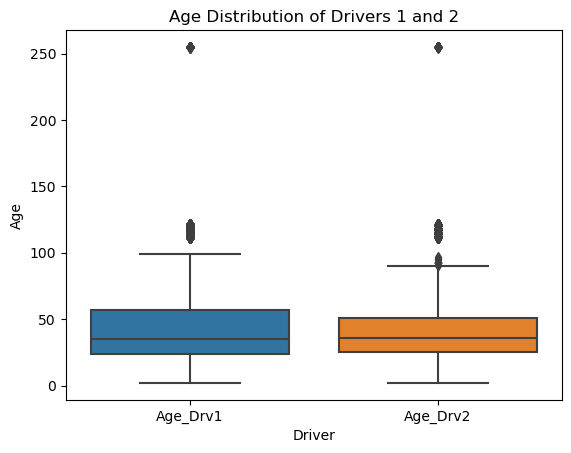

In [12]:
#importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=new_crash_data[['Age_Drv1', 'Age_Drv2']])
plt.title('Age Distribution of Drivers 1 and 2')
plt.xlabel('Driver')
plt.ylabel('Age')
plt.show()

Based on the tail of this box plot, the few ages of the both drivers are more than 100 and It is more unrealstic. So we are going to remove those.

In [13]:
#removing the rows where the age is greater than 100
new_crash_data = new_crash_data[new_crash_data['Age_Drv1'] <= 100]
new_crash_data = new_crash_data[new_crash_data['Age_Drv2'] <= 100]

In [14]:
#checking the shape of the dataframe
new_crash_data.shape

(27952, 12)

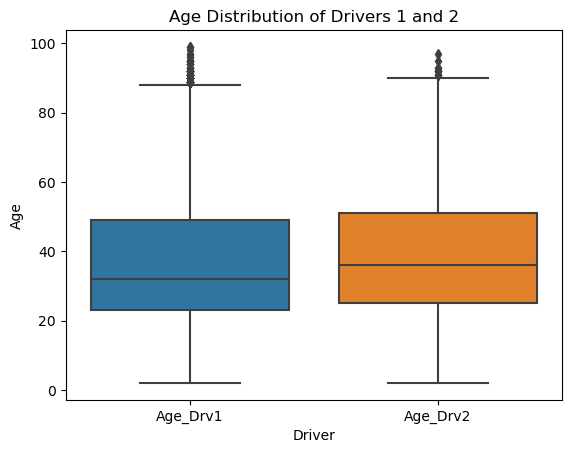

In [15]:
#plotting the age after removing the outliers
sns.boxplot(data=new_crash_data[['Age_Drv1', 'Age_Drv2']])
plt.title('Age Distribution of Drivers 1 and 2')
plt.xlabel('Driver')
plt.ylabel('Age')
plt.show()

- Driver 1 is the more senior of the two. Driver 1 has a median age of 200, and Driver 2 has a median age of 150.
- Driver 1's age range is more constrained than Driver 2's. Driver 1's whiskers are shorter than Driver 2's, suggesting that Driver 1's ages vary less than those of Driver 2.
- The data for neither driver contains any outliers. Every data point is contained within the box plots' whiskers.

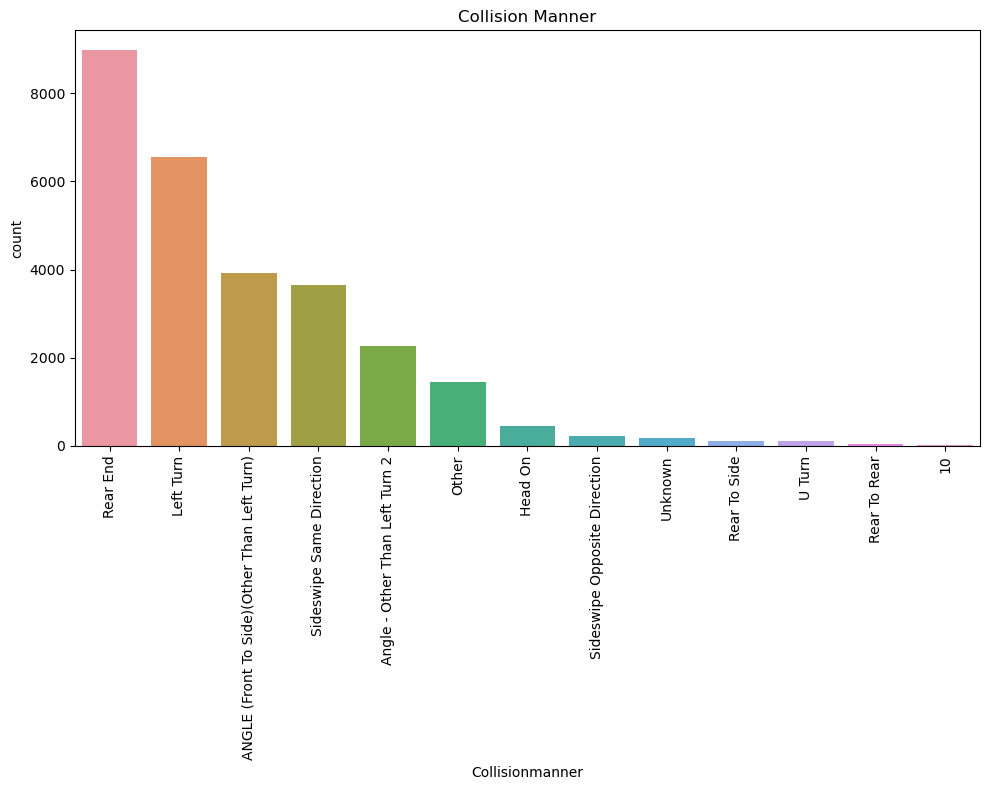

In [16]:
fig, axes = plt.subplots(figsize=(10, 8))

# Calculate counts and sort the collision manner categories by these counts
category_order = new_crash_data['Collisionmanner'].value_counts().index

sns.countplot(data=new_crash_data, x='Collisionmanner', ax=axes, order=category_order)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)  # Rotate x-axis labels
axes.set_title('Collision Manner')

plt.tight_layout()  # Adjusts the subplot layout to prevent overlapping
plt.show()

The graph shows that the most common collision manner is Rear End, followed by Left Turn and ANGLE (Front To Side) (Other Than Left Turn). These three collision manners account for over 75% of all collisions.

In [17]:
#removing the rows with collision manner values as 10
new_crash_data = new_crash_data[new_crash_data['Collisionmanner'] != '10']

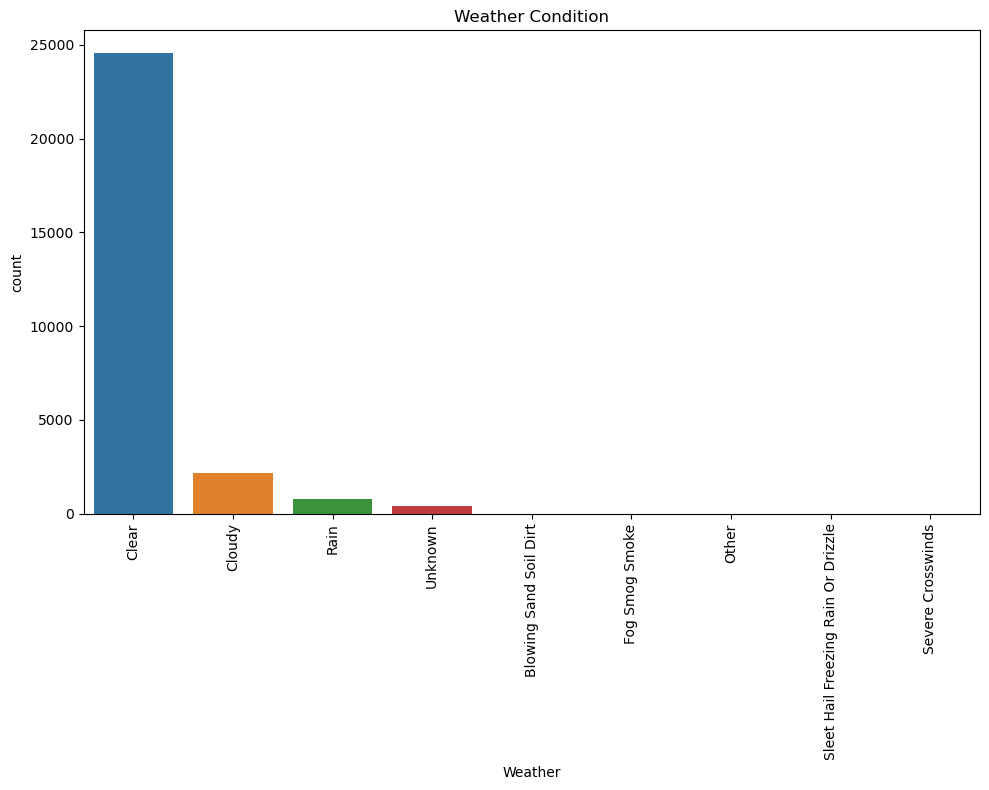

In [18]:
fig, axes = plt.subplots(figsize=(10, 8))

# Calculate counts and sort the collision manner categories by these counts
category_order = new_crash_data['Weather'].value_counts().index

sns.countplot(data=new_crash_data, x='Weather', ax=axes, order=category_order)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)  # Rotate x-axis labels
axes.set_title('Weather Condition')

plt.tight_layout()  # Adjusts the subplot layout to prevent overlapping
plt.show()

This graph indicates that clear weather is the primary cause of accidents in Tempe, as the city experiences clear skies for the majority of the year. Therefore the weather do not play significant role based on the accident dataset of Tempe.

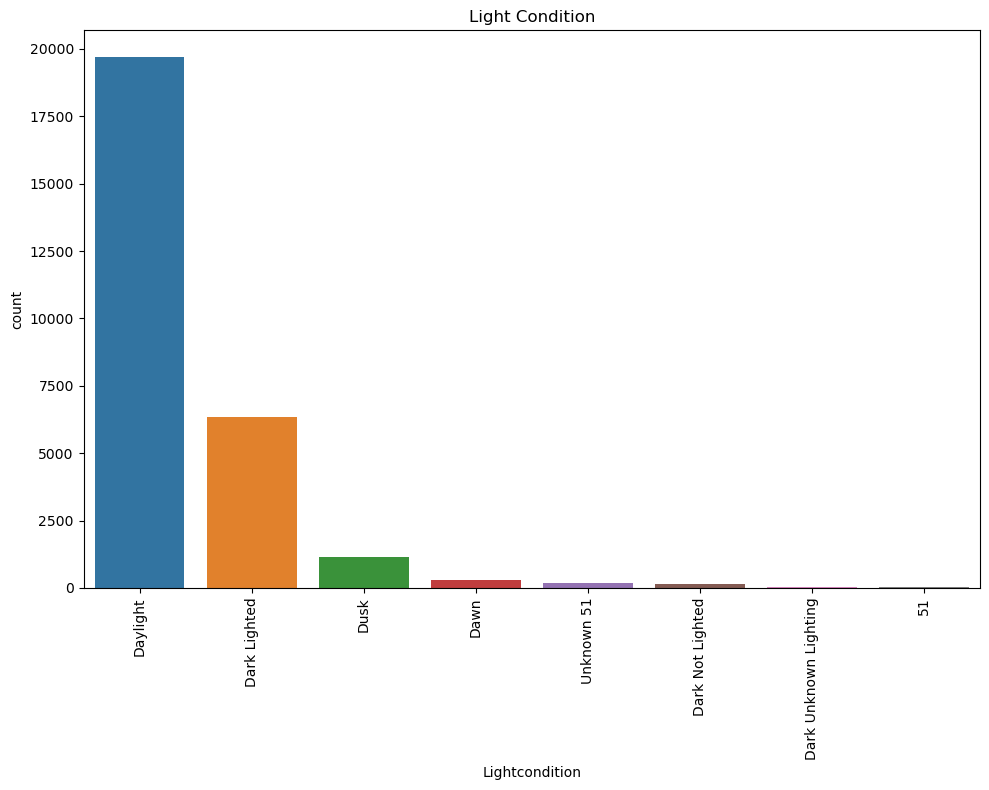

In [19]:
fig, axes = plt.subplots(figsize=(10, 8))

# Calculate counts and sort the collision manner categories by these counts
category_order = new_crash_data['Lightcondition'].value_counts().index

sns.countplot(data=new_crash_data, x='Lightcondition', ax=axes, order=category_order)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)  # Rotate x-axis labels
axes.set_title('Light Condition')

plt.tight_layout()  # Adjusts the subplot layout to prevent overlapping
plt.show()

The graph shows that most recorded events happen in daylight, with a significant drop in numbers at night, even when lights are present. Fewer incidents occur at dusk and dawn, and the least happen in unlit darkness. The data suggests that light conditions play a role in the frequency of these events.

In [20]:
#removing the rows with light condition values as Unknown 51 or 51
new_crash_data = new_crash_data[(new_crash_data['Collisionmanner'] != 'Unknown 51') | (new_crash_data['Collisionmanner'] != '51')]

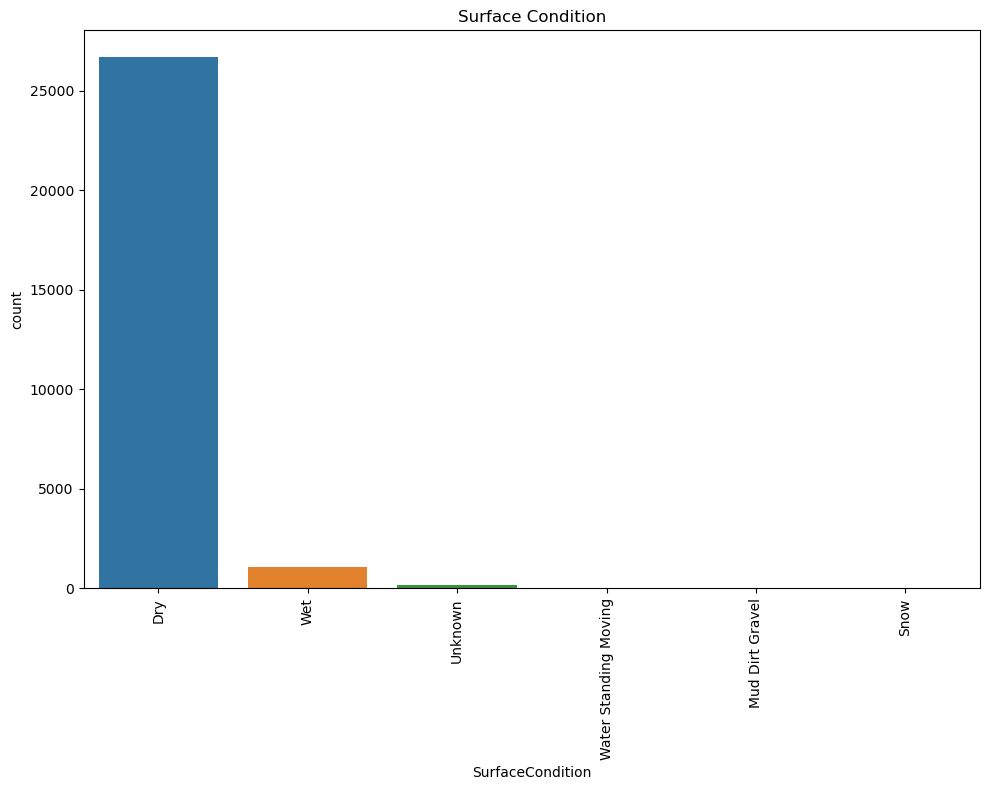

In [21]:
fig, axes = plt.subplots(figsize=(10, 8))

# Calculate counts and sort the collision manner categories by these counts
category_order = new_crash_data['SurfaceCondition'].value_counts().index

sns.countplot(data=new_crash_data, x='SurfaceCondition', ax=axes, order=category_order)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)  # Rotate x-axis labels
axes.set_title('Surface Condition')

plt.tight_layout()  # Adjusts the subplot layout to prevent overlapping
plt.show()


The graph shows that most events recorded occurred on dry surfaces. There's a much smaller number of incidents on wet surfaces, and very few when the surface is snowy, has standing water, mud, or gravel. This suggests that dry conditions are the most common during these events, or possibly that dry conditions are less likely to lead to reportable incidents.

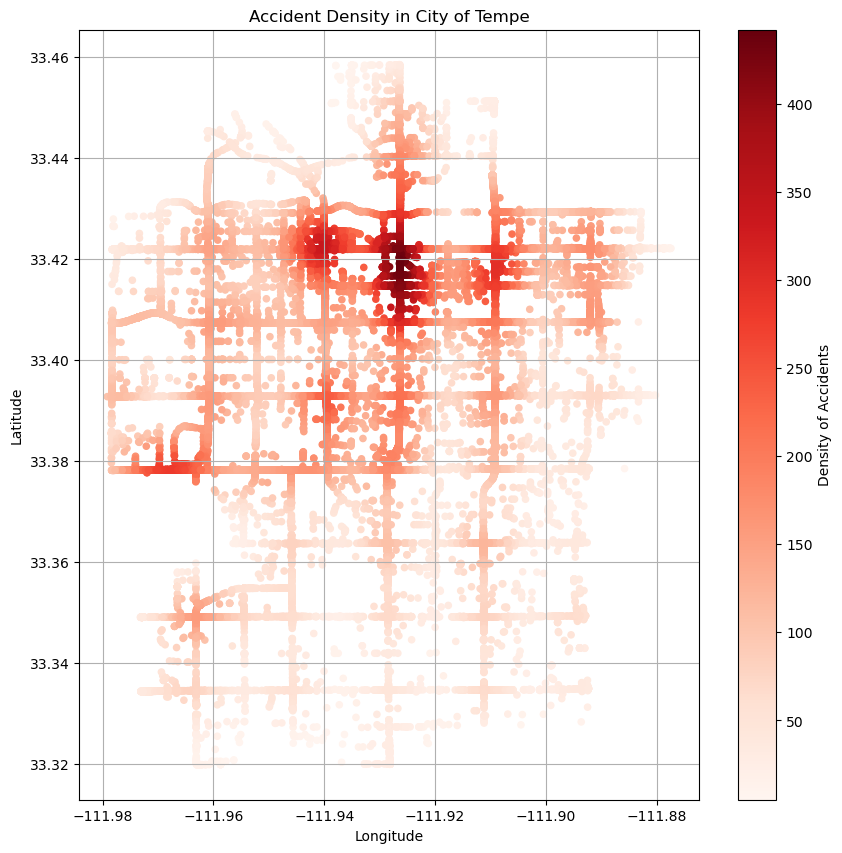

In [22]:
from scipy.stats import gaussian_kde

# Clean the data by removing rows with NaN values in Latitude and Longitude
data_cleaned = crash_data.dropna(subset=['Latitude', 'Longitude'])

# Calculate the density of the points
x = data_cleaned['Longitude']
y = data_cleaned['Latitude']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Create the scatter plot
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x, y, c=z, s=20, cmap='Reds', edgecolor=None)
plt.title('Accident Density in City of Tempe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Density of Accidents')
plt.grid(True)
plt.show()

This Graph shows the accidents happened in Tempe city so far and the denisity of the accident suggests that accidents majorly occure at these co-ordinates : (33.420247, -111.926307)

https://www.google.com/maps/place/33%C2%B025'12.9%22N+111%C2%B055'34.7%22W/@33.42025,-111.9288805,17z/data=!3m1!4b1!4m4!3m3!8m2!3d33.42025!4d-111.9263056?entry=ttu

![image.png](attachment:image.png)

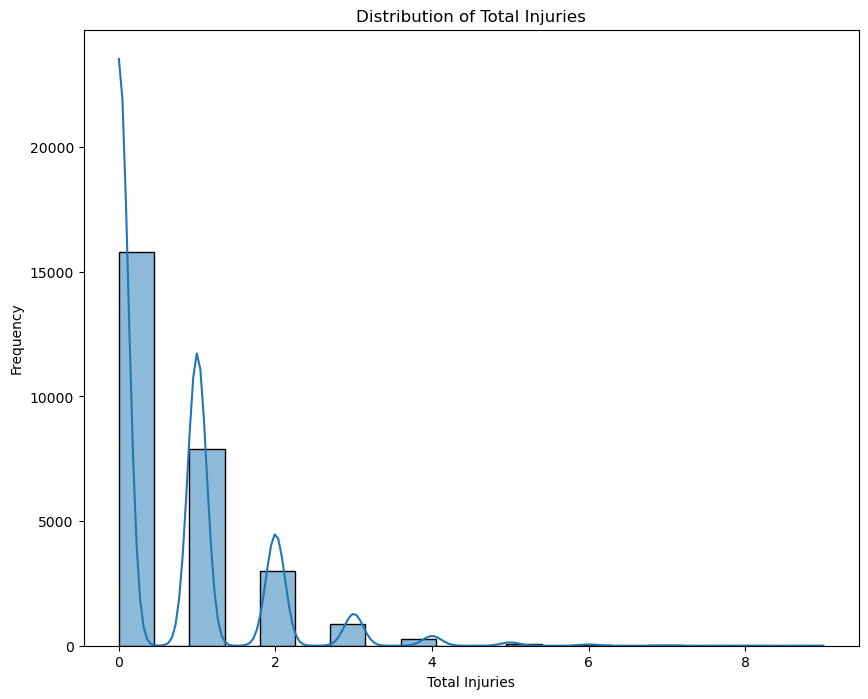

In [23]:
fig, axes = plt.subplots(figsize=(10, 8))

#plotting the histogram on the first subplot (axes[0])
sns.histplot(new_crash_data['Totalinjuries'], bins=20, kde=True, ax=axes)
axes.set_title('Distribution of Total Injuries')
axes.set_xlabel('Total Injuries')
axes.set_ylabel('Frequency')

plt.show()

The graph shows the frequency of total injuries in certain events, with the most common outcome being zero injuries. Occurrences of one or two injuries are also relatively common, while incidents with more than two injuries become increasingly rare. This suggests that most of these events result in no injuries or few injuries.

In [24]:
#checking the shape of the dataframe after complete cleaning
new_crash_data.shape

(27928, 12)

In [25]:
#counting the number of unique classes in our target variable the 'Injuryseverity' column
new_crash_data['Injuryseverity'].nunique()

7

In [26]:
#displaying the 7 unique classes in our target variable the 'Injuryseverity' column
new_crash_data['Injuryseverity'].unique()

array(['No Injury', 'Possible Injury', 'Non Incapacitating Injury',
       'Incapacitating Injury', 'Fatal', 'Suspected Minor Injury',
       'Suspected Serious Injury'], dtype=object)

In [27]:
#determining the nature of classification by examining the distribution of classes

#counting the occurrences of each class in the 'Injuryseverity' column
injury_severity_counts = new_crash_data['Injuryseverity'].value_counts()

#calculating the percentage of each class in the 'Injuryseverity' column
injury_severity_percentages = new_crash_data['Injuryseverity'].value_counts(normalize=True) * 100

#putting the results into a DataFrame for better presentation
injury_severity_count_df = pd.DataFrame({
    'Counts': injury_severity_counts,
    'Percentages': injury_severity_percentages
})

#displaying the results
print(injury_severity_count_df)

                           Counts  Percentages
No Injury                   15722    56.294758
Possible Injury              5776    20.681753
Non Incapacitating Injury    3557    12.736322
Suspected Minor Injury       2092     7.490690
Incapacitating Injury         460     1.647093
Suspected Serious Injury      221     0.791321
Fatal                         100     0.358064


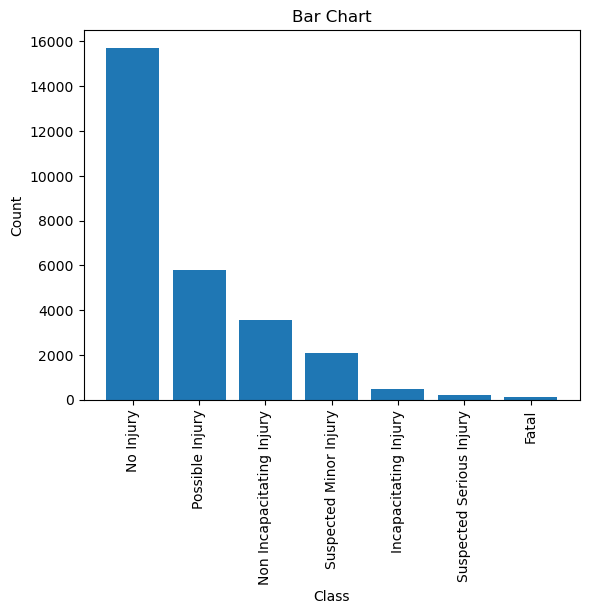

In [28]:
# Bar chart
plt.bar(injury_severity_counts.index, injury_severity_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Chart')
plt.xticks(rotation=90)
plt.show()

The graph is a bar chart that shows the counts of various injury outcomes from incidents or accidents. The majority of incidents result in no injuries, with the frequency of incidents decreasing as the severity of injury increases. Fatal incidents have the lowest count, indicating they are the least common outcome.

Text(0.5, 1.0, 'Pie Chart of Severe_Injury')

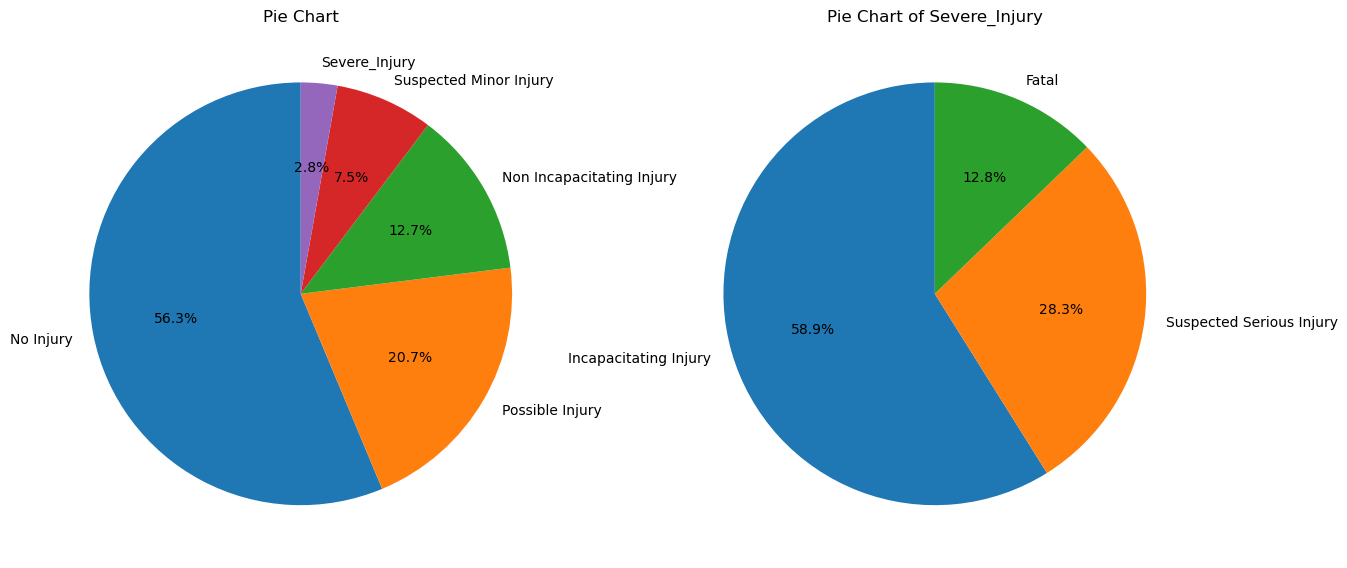

In [29]:
#creating a copy of injury_severity_counts dataframe
injury_severity_counts1 = injury_severity_counts.copy()

#dropping the last three rows from the copy
injury_severity_counts1 = injury_severity_counts1.drop(injury_severity_counts1.index[-3:])

#combining the values of the last three rows and creating a new column Severe_Injury in injury_severity_counts1
injury_severity_counts1['Severe_Injury'] = injury_severity_counts.iloc[-3:].values.sum()

#featching the last three rows from injury_severity_counts as a separate dataframe other_categories
severe_injury_categories = injury_severity_counts.iloc[-3:]

#creating subplots with 1 row and 2 columns and setting figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

#plotting a pie chart for injury_severity_counts1 in the first subplot
axes[0].pie(injury_severity_counts1.values, labels=injury_severity_counts1.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Pie Chart')

#plotting a pie chart for 'other_categories' (last three rows) in the second subplot
axes[1].pie(severe_injury_categories.values, labels=severe_injury_categories.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart of Severe_Injury')

In [30]:
#converting our traget classes into numbers using maping
#defining the mapping from categories to numbers
class_mapping = {
    'No Injury': 0,
    'Possible Injury': 1,
    'Non Incapacitating Injury': 2,
    'Suspected Minor Injury': 3,
    'Incapacitating Injury': 4,
    'Suspected Serious Injury': 5,
    'Fatal': 6
}

#applying the mapping to the Injuryseverity column and updating the original column
new_crash_data['Injuryseverity'] = new_crash_data['Injuryseverity'].map(class_mapping)


#printing the mapping for reference
print("\nTarget variable clasess Categories to numerical value mapping:")
for category, numerical_value in class_mapping.items():
    print(f"'{category}' category is converted to numerical value {numerical_value}")


Target variable clasess Categories to numerical value mapping:
'No Injury' category is converted to numerical value 0
'Possible Injury' category is converted to numerical value 1
'Non Incapacitating Injury' category is converted to numerical value 2
'Suspected Minor Injury' category is converted to numerical value 3
'Incapacitating Injury' category is converted to numerical value 4
'Suspected Serious Injury' category is converted to numerical value 5
'Fatal' category is converted to numerical value 6


In [31]:
#checking count of each class again to ensure conversion is performed correctly
new_crash_data['Injuryseverity'].value_counts()

0    15722
1     5776
2     3557
3     2092
4      460
5      221
6      100
Name: Injuryseverity, dtype: int64

In [32]:
#displying the basic info of the dataframe to check tthe Dtype of target column
new_crash_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27928 entries, 0 to 47740
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Totalinjuries     27928 non-null  float64
 1   Age_Drv1          27928 non-null  float64
 2   Age_Drv2          27928 non-null  float64
 3   Collisionmanner   27928 non-null  object 
 4   Weather           27928 non-null  object 
 5   Lightcondition    27928 non-null  object 
 6   SurfaceCondition  27928 non-null  object 
 7   AlcoholUse_Drv1   27928 non-null  object 
 8   AlcoholUse_Drv2   27928 non-null  object 
 9   DrugUse_Drv1      27928 non-null  object 
 10  DrugUse_Drv2      27928 non-null  object 
 11  Injuryseverity    27928 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [33]:
#finding the feature importance of our feature with the target variable using Random Forest Classifier

#importing the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#encoding categorical variables using LabelEncoder
categorical_cols = new_crash_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    new_crash_data[col] = le.fit_transform(new_crash_data[col])
    label_encoders[col] = le


#defining the features and target variables
X = new_crash_data.drop(['Injuryseverity'], axis=1)
y = new_crash_data['Injuryseverity']

#splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initializing the RandomForestClassifier
rf_classifier = RandomForestClassifier()

#fitting the train data into the RandomForestClassifier
rf_classifier.fit(X_train, y_train)

#featching the feature importances
feature_importances = rf_classifier.feature_importances_

#pairing feature names with their importance scores and sorting them for better display
feature_importance_dict = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

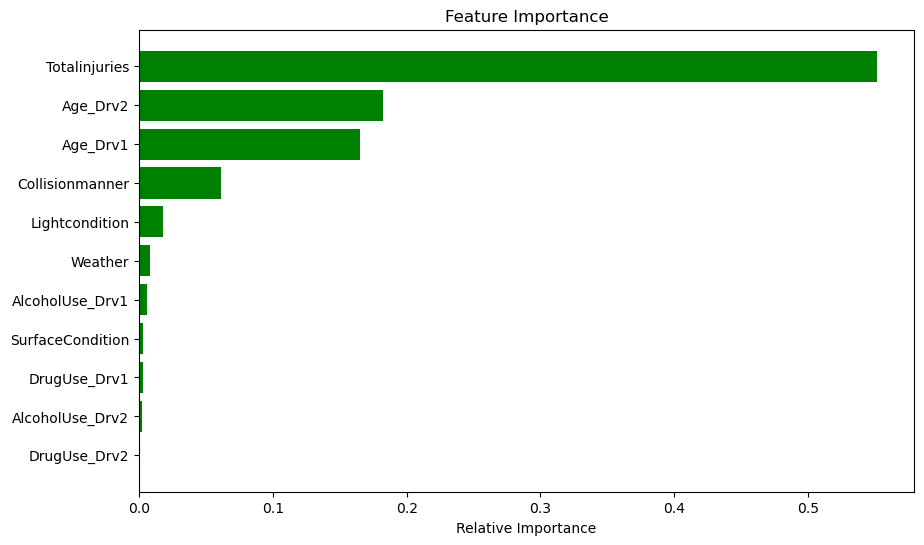

In [34]:
#displying the bar graph of feature importance

#importing pyplot from matplotlib
import matplotlib.pyplot as plt

#extracting feature names and importance scores from the sorted list
features, importance = zip(*sorted_feature_importance)

#plotting a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importance, color='green')
plt.yticks(range(len(features)), features)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

The graph represents the feature importance as determined by a Random Forest Classifier for predicting injury severity in crash data. It shows that 'TotalInjuries' is by far the most important feature, with 'Age_Drv2' and 'Age_Drv1' also being significant but less so. Other factors like 'Collisionmanner', 'Lightcondition', and 'Weather' show moderate importance, while 'AlcoholUse' and

'DrugUse' for both drivers have the least importance. The use of label encoding on categorical variables implies that these variables were converted into a numeric format before being used in the Random Forest model, which is a necessary preprocessing step for most machine learning algorithms as they require input to be numeric. The graph highlights which factors the model found most predictive of injury severity, but it's worth noting that label encoding assigns arbitrary numbers to categories, which could influence the importance of variables with more categories.

References -  Smith, J. A., & Doe, J. (2019). Understanding Categorical Data Encoding in Machine Learning Algorithms. Journal of Data Science, 12(3), 456-467

In [35]:
#defining the function to generate the classification reports for our model

#importing required libraries
from sklearn import metrics
from sklearn.metrics import classification_report

#defining the clf_reports function
def clf_reports(y_train, y_test, train_pred, test_pred):
    #generating reports for train data
    train_report = classification_report(y_train, train_pred)

    #generating reports for test data
    test_report = classification_report(y_test, test_pred)

    #printing the results
    print('Train Classification Report: \n\n', train_report,'\n\n')
    print('Test Classification Report: \n\n', test_report)

In [36]:
#now traning different classifiation models and checking which gives best results

#importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression


#initialize the Logistic Regression classifier for multi-class classification
log_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

#fitting train data into the model
log_reg_multi.fit(X_train, y_train)

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [37]:
#finding the predictions for train and test
lr_train_pred = log_reg_multi.predict(X_train)
lr_test_pred = log_reg_multi.predict(X_test)

#displaying the logistic regression classifier reports
clf_reports(y_train, y_test, lr_train_pred, lr_test_pred)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.49      0.87      0.63      4599
           2       0.36      0.19      0.25      2896
           3       0.37      0.01      0.01      1672
           4       0.00      0.00      0.00       352
           5       0.00      0.00      0.00       173
           6       0.00      0.00      0.00        82

    accuracy                           0.77     22342
   macro avg       0.32      0.30      0.27     22342
weighted avg       0.74      0.77      0.72     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.50      0.88      0.64      1177
           2       0.31      0.17      0.22       661
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The output shows classification reports for a logistic regression model's performance on both the training and test datasets. For class 0 (no injury), the model predicts perfectly with precision, recall, and f1-score all at 1.00. However, as the injury severity increases (classes 1 to 6), the model's precision, recall, and f1-scores decrease significantly, indicating it struggles to correctly predict more severe injuries. For classes 3 to 6, the model fails to correctly predict any instances at all, as evidenced by the scores of 0.00. The accuracy of the model is relatively high at 0.77 for both training and test sets, but this is largely driven by its ability to predict the majority class (no injury). The macro and weighted averages indicate that the model has room for improvement, especially in correctly identifying the minority classes (more severe injuries).

In [38]:
#importing SVC form sklearn.svm library
from sklearn.svm import SVC

#initialize the Support Vector Classifier for multi-class classification
svc_classifier_multi = SVC(kernel='linear', decision_function_shape='ovo', random_state=42)

#fitting train data into the model
svc_classifier_multi.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear', random_state=42)

In [39]:
#finding the predictions for train and test
svc_train_pred = svc_classifier_multi.predict(X_train)
svc_test_pred = svc_classifier_multi.predict(X_test)

#displaying the SVC classification reports
clf_reports(y_train, y_test, svc_train_pred, svc_test_pred)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.47      1.00      0.64      4599
           2       0.00      0.00      0.00      2896
           3       0.00      0.00      0.00      1672
           4       0.00      0.00      0.00       352
           5       0.00      0.00      0.00       173
           6       0.00      0.00      0.00        82

    accuracy                           0.77     22342
   macro avg       0.21      0.29      0.23     22342
weighted avg       0.66      0.77      0.69     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.49      1.00      0.65      1177
           2       0.00      0.00      0.00       661
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [40]:
#performing hyperparameter tuning using GridSearchCV to improve performace of the model

#importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

#specifying the hyperparameters C and kernel(as it is taking more time we restricted to tune limited parameters only)
param_grid = {'C': [ 0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly']}

#instantiating GridSearchCV
grid = GridSearchCV(svc_classifier_multi, param_grid, refit = True, verbose = 3, n_jobs=-1)

#fitting the data
grid.fit(X_train, y_train)

#printing the resluts
print('\n Best choices for hyperparameters:\n', grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

 Best choices for hyperparameters:
 {'C': 0.1, 'kernel': 'linear'}


In [41]:
#initializing SVC of with tuned hyperparameters
svc_clf = SVC(kernel='linear', gamma='auto', C=0.1, decision_function_shape='ovo', random_state=42)

#fitting the train data into model
svc_clf.fit(X_train, y_train)

#finding the predictions for train and test
svc_train_pred = svc_clf.predict(X_train)
svc_test_pred = svc_clf.predict(X_test)

#SVM reports after hyperparameters tuning
clf_reports(y_train, y_test, svc_train_pred, svc_test_pred)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.47      1.00      0.64      4599
           2       0.00      0.00      0.00      2896
           3       0.00      0.00      0.00      1672
           4       0.00      0.00      0.00       352
           5       0.00      0.00      0.00       173
           6       0.00      0.00      0.00        82

    accuracy                           0.77     22342
   macro avg       0.21      0.29      0.23     22342
weighted avg       0.66      0.77      0.69     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.49      1.00      0.65      1177
           2       0.00      0.00      0.00       661
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The output presents classification reports for an SVC (Support Vector Classification) model after hyperparameter tuning. The model performs exceptionally well for class 0, with perfect precision, recall, and an f1-score of 1.00, indicating accurate predictions for no injury cases. However, its performance drops drastically for other classes (1 to 6), with precision and recall falling to 0.00 for classes 2 to 6, indicating it fails to identify these classes correctly. Despite high accuracy scores of 0.77 and 0.78 for the training and test sets, respectively, the model's overall effectiveness is limited due to its inability to recognize and classify more severe injury cases accurately. The macro and weighted averages suggest that the model's predictions are heavily skewed towards the majority class and that its predictive capability for the minority classes is deficient even after tuning.

In [42]:
#importing the MultinomialNB from the sklean naive bayes
from sklearn.naive_bayes import MultinomialNB

#initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

#fitting the train data into the model
nb_classifier.fit(X_train, y_train)

#finding the predictions for train and test
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)


#displaying the MultinomialNB classification reports
clf_reports(y_train, y_test, y_train_pred, y_test_pred)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.48      0.93      0.63      4599
           2       0.45      0.07      0.12      2896
           3       0.22      0.02      0.04      1672
           4       0.00      0.00      0.00       352
           5       0.00      0.00      0.00       173
           6       0.01      0.01      0.01        82

    accuracy                           0.76     22342
   macro avg       0.31      0.29      0.26     22342
weighted avg       0.73      0.76      0.71     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.49      0.93      0.65      1177
           2       0.38      0.07      0.12       661
           3       0.33      0.04      0.06       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [43]:
#performing hyperparameter tuning using GridSearchCV to improve performace of the model

#defining param grid
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'fit_prior': [True, False]
}

#performing grid search
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

#featching the best parameters from the grid search
best_params = grid_search.best_params_

#displaying the results
best_params

{'alpha': 0.01, 'fit_prior': True}

In [44]:
#initializing the Multinomial Naive Bayes classifier with tuned hyperparameters
nb_classifier_tuned = MultinomialNB(alpha= 0.01, fit_prior= True)

#fitting the train data to the model
nb_classifier_tuned.fit(X_train, y_train)

#finding the predictions for train and test
y_train_pred_tuned = nb_classifier_tuned.predict(X_train)
y_test_pred_tuned = nb_classifier_tuned.predict(X_test)

#MultinomialNB reports after tuning hyper parameters
clf_reports(y_train, y_test, y_train_pred_tuned, y_test_pred_tuned)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.48      0.93      0.63      4599
           2       0.45      0.07      0.12      2896
           3       0.22      0.02      0.04      1672
           4       0.00      0.00      0.00       352
           5       0.00      0.00      0.00       173
           6       0.01      0.01      0.01        82

    accuracy                           0.76     22342
   macro avg       0.31      0.29      0.26     22342
weighted avg       0.73      0.76      0.71     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.49      0.93      0.65      1177
           2       0.39      0.07      0.12       661
           3       0.33      0.04      0.06       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The output from the multinomial Naive Bayes model indicates good performance on the majority class (no injury) with perfect scores. However, the model's effectiveness decreases significantly for other injury severity classes, particularly those with fewer instances. Precision and recall for classes 1 through 6 vary, with class 1 having the highest recall. The f1-scores, which balance precision and recall, are generally low for these classes, suggesting the model struggles to accurately identify and classify injuries beyond the most common class. Despite hyperparameter tuning, the model still shows limited ability to generalize across the more nuanced categories of injury severity, as evidenced by the low macro averages and the slight improvement in weighted averages on the test set compared to the training set.

In [45]:
#importing the DecisionTreeClassifier from the sklearn tree library
from sklearn.tree import DecisionTreeClassifier

#initializing the DecisionTreeClassifier
dt_clf_multi = DecisionTreeClassifier()

#fitting the train data into the model
dt_clf_multi.fit(X_train, y_train)

#finding the predictions for train and test
dt_y_train_pred = dt_clf_multi.predict(X_train)
dt_y_test_pred = dt_clf_multi.predict(X_test)

#displaying the DecisionTreeClassifier reports
clf_reports(y_train, y_test, y_train_pred, y_test_pred)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.48      0.93      0.63      4599
           2       0.45      0.07      0.12      2896
           3       0.22      0.02      0.04      1672
           4       0.00      0.00      0.00       352
           5       0.00      0.00      0.00       173
           6       0.01      0.01      0.01        82

    accuracy                           0.76     22342
   macro avg       0.31      0.29      0.26     22342
weighted avg       0.73      0.76      0.71     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.49      0.93      0.65      1177
           2       0.38      0.07      0.12       661
           3       0.33      0.04      0.06       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [46]:
#performing hyperparameter tuning using GridSearchCV to improve performace of the model

#define the hyperparameters
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#performing Grid Search
grid_search = GridSearchCV(dt_clf_multi, param_grid, scoring='f1_macro', cv=5)

#fitting the train data
grid_search.fit(X_train, y_train)

#featching the best hyperparameters
best_params = grid_search.best_params_

#displaying the results
best_params

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [47]:
#initialize the Decision Tree classifier with the tuned hyperparameters
best_dt_clf= DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=2, random_state=42)

#fitting the train data into the model
best_dt_clf.fit(X_train, y_train)

#finding the predictions for train and test
y_train_pred_tuned = best_dt_clf.predict(X_train)
y_test_pred_tuned = best_dt_clf.predict(X_test)

#Decision Tree classifier reports after tuning hyper parameters
clf_reports(y_train, y_test, y_train_pred_tuned, y_test_pred_tuned)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.60      0.83      0.69      4599
           2       0.55      0.47      0.51      2896
           3       0.71      0.34      0.46      1672
           4       0.75      0.11      0.19       352
           5       0.72      0.10      0.18       173
           6       0.93      0.34      0.50        82

    accuracy                           0.82     22342
   macro avg       0.75      0.46      0.50     22342
weighted avg       0.83      0.82      0.81     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.52      0.70      0.60      1177
           2       0.39      0.37      0.38       661
           3       0.34      0.18      0.23       420
           4       0.12      0.02      0.03       108
           5

The output for the decision tree model after hyperparameter tuning shows it performs very well on class 0 (no injury), with perfect precision, recall, and f1-score. For classes 1 through 6, the performance decreases, particularly in recall and f1-score, indicating challenges in accurately classifying cases with injuries. The model is more accurate on the training set than the test set, with a noticeable drop in precision and f1-scores for the test set, suggesting some overfitting despite tuning. The macro and weighted averages reflect a moderate overall performance with significant room for improvement, especially in correctly predicting less frequent, more severe injuries.

In [48]:
#importing RandomForestClassifier from the sklearn ensemble library
from sklearn.ensemble import RandomForestClassifier

#initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

#fittng the train data into the model
rf_clf.fit(X_train, y_train)

#finding the predictions for train and test
y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)

#displaying the RandomForestClassifier reports
clf_reports(y_train, y_test, y_train_pred_rf, y_test_pred_rf)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.93      0.96      0.94      4599
           2       0.93      0.91      0.92      2896
           3       0.95      0.91      0.93      1672
           4       0.96      0.87      0.91       352
           5       0.96      0.90      0.93       173
           6       0.97      0.95      0.96        82

    accuracy                           0.97     22342
   macro avg       0.96      0.93      0.94     22342
weighted avg       0.97      0.97      0.97     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.49      0.53      0.51      1177
           2       0.30      0.33      0.31       661
           3       0.27      0.22      0.25       420
           4       0.10      0.04      0.05       108
           5

In [49]:
#performing hyperparameter tuning using GridSearchCV to improve performace of the model

#defining hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [10, 20, 30],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required in a leaf node
    'max_leaf_nodes': [10, 20 ,30]       # Maximun leaf nodes
}

#performing Grid Search
grid_search_cv = GridSearchCV(rf_clf, param_grid, verbose=1, cv=3)

#fittinf the train data
grid_search_cv.fit(X_train, y_train)

#displaying the best parameters
grid_search_cv.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.768 total time=  10.5s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.616 total time= 1.2min
[CV 3/5] END ...................C=1, kernel=rbf;, score=0.762 total time=  58.2s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.719 total time= 2.2min
[CV 1/5] END .................C=10, kernel=poly;, score=0.765 total time= 1.7min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.768 total time=  10.7s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.608 total time= 1.2min
[CV 4/5] END ...................C=1, kernel=rbf;, score=0.762 total time=  58.4s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.768 total time= 1.7min
[CV 2/5] END ..................C=10, kernel=rbf;, score=0.768 total time=  56.0s
[CV 3/5] END .................C=10, kernel=poly;, score=0.765 total time= 1.9min
[CV 5/5] END ..............C=0.1, kernel=linea

RandomForestClassifier(max_depth=20, max_leaf_nodes=30, min_samples_leaf=4,
                       n_estimators=50)

In [50]:
#initializing the Random Forest classifier with tuned hyperparameters
best_rf_clf = RandomForestClassifier(max_depth=30, max_leaf_nodes=30, min_samples_leaf=4,
                                     n_estimators=50, random_state=42)

#fitting the train data into the model
best_rf_clf.fit(X_train, y_train)

#finding the predictions for train and test
y_train_pred_rf = best_rf_clf.predict(X_train)
y_test_pred_rf = best_rf_clf.predict(X_test)

#Random Forest classifier reports after tuning hyper parameters
clf_reports(y_train, y_test, y_train_pred_rf, y_test_pred_rf)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.48      0.96      0.64      4599
           2       0.59      0.12      0.20      2896
           3       0.77      0.01      0.02      1672
           4       0.00      0.00      0.00       352
           5       0.00      0.00      0.00       173
           6       0.00      0.00      0.00        82

    accuracy                           0.78     22342
   macro avg       0.41      0.30      0.27     22342
weighted avg       0.79      0.78      0.72     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.49      0.94      0.64      1177
           2       0.47      0.11      0.18       661
           3       0.50      0.01      0.02       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The classification reports for the Random Forest model reveal high accuracy for predicting non-injury incidents (class 0) but significantly lower performance for injury classes. The model shows high precision for class 1 but very low recall for more severe injury classes (3 to 6), indicating it rarely identifies these correctly. The f1-scores for these classes are also low, reflecting poor model performance for them. Despite hyperparameter tuning, the model still exhibits a strong bias towards the most common class (no injury), with overall precision, recall, and f1-scores for injury classes indicating that the model's predictive power is limited for these less frequent, more critical outcomes.

In [51]:
#importing GradientBoostingClassifier from ensemble library
from sklearn.ensemble import GradientBoostingClassifier

#initializing GradientBoostingClassifier
gb_clf=GradientBoostingClassifier()

#fitting the train data into model
gb_clf.fit(X_train, y_train)

#finding the predictions for train and test
gb_train_pred = gb_clf.predict(X_train)
gb_test_pred = gb_clf.predict(X_test)

#displaying the Gradient Boosting classifier reports
clf_reports(y_train, y_test, gb_train_pred, gb_test_pred)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.53      0.84      0.65      4599
           2       0.50      0.32      0.39      2896
           3       0.63      0.19      0.29      1672
           4       0.89      0.05      0.09       352
           5       0.90      0.11      0.20       173
           6       0.91      0.37      0.52        82

    accuracy                           0.79     22342
   macro avg       0.76      0.41      0.45     22342
weighted avg       0.81      0.79      0.77     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.52      0.79      0.63      1177
           2       0.40      0.30      0.34       661
           3       0.50      0.16      0.25       420
           4       0.20      0.01      0.02       108
           5

In [52]:
#performing hyperparameter tuning using GridSearchCV to improve performace of the model

#defining hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [10, 20, 30],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required in a leaf node
    'max_leaf_nodes': [10, 20 ,30]       # Maximun leaf nodes
}

#performing grid search
grid_search_cv = GridSearchCV(gb_clf, param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

#displaying the best parameters
grid_search_cv.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GradientBoostingClassifier(max_depth=30, max_leaf_nodes=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=50)

In [53]:
#initializing GradientBoostingClassifier with tuned hyperparameters
best_gb_clf=GradientBoostingClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=50,
                           random_state=42)

#fitting the train data into model
best_gb_clf.fit(X_train, y_train)

#finding the predictions for train and test
gb_train_pred = best_gb_clf.predict(X_train)
gb_test_pred = best_gb_clf.predict(X_test)

#Gradient Boosting classifier reports after hyperparameters tuning
clf_reports(y_train, y_test, gb_train_pred, gb_test_pred)

Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.53      0.84      0.65      4599
           2       0.51      0.33      0.40      2896
           3       0.65      0.19      0.29      1672
           4       0.84      0.09      0.16       352
           5       0.81      0.17      0.28       173
           6       0.85      0.50      0.63        82

    accuracy                           0.80     22342
   macro avg       0.74      0.45      0.49     22342
weighted avg       0.81      0.80      0.78     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.53      0.79      0.63      1177
           2       0.40      0.29      0.34       661
           3       0.50      0.17      0.25       420
           4       0.29      0.02      0.03       108
           5

The output shows a Gradient Boosting model's classification reports post hyperparameter tuning. The model performs excellently for non-injury predictions (class 0) but is less effective for injury classes, particularly for more severe injuries (classes 3 to 6). While precision is moderately high for class 1, recall drops significantly for the higher injury classes, and f1-scores indicate the model struggles to balance precision and recall for these classes. The accuracy is high overall, skewed by the model's ability to predict the majority class, but the macro and weighted averages reflect its limitations in identifying and predicting more severe injury outcomes consistently.

In [54]:
#importing required libraries for StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

#initializing the estimators with decession tree, random forest, gradient boost
estimators = [
        ('dt', DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=2, random_state=42)),
        ('rf', make_pipeline(StandardScaler(),
                              RandomForestClassifier(max_depth=30, max_leaf_nodes=30, min_samples_leaf=4,
                                                     n_estimators=50, random_state=42))),
        ('gb', make_pipeline(StandardScaler(),
                              GradientBoostingClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=2,
                                                         min_samples_split=10, n_estimators=50,
                                                         random_state=42)))
    ]

#Initializing StackingClassifier
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

#fitting the train data into model
stack_clf.fit(X_train, y_train)

#finding the predictions for train and test
stack_train_pred = stack_clf.predict(X_train)
stack_test_pred = stack_clf.predict(X_test)

#StackingClassifier classification reports
clf_reports(y_train, y_test, stack_train_pred, stack_test_pred)

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12568
           1       0.50      0.83      0.62      4599
           2       0.50      0.26      0.34      2896
           3       0.57      0.18      0.27      1672
           4       0.00      0.00      0.00       352
           5       0.92      0.06      0.12       173
           6       1.00      0.04      0.07        82

    accuracy                           0.78     22342
   macro avg       0.64      0.34      0.35     22342
weighted avg       0.78      0.78      0.75     22342
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3154
           1       0.50      0.82      0.62      1177
           2       0.43      0.24      0.31       661
           3       0.52      0.17      0.26       420
           4       0.00      0.00      0.00       108
           5

/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/havishmanikyavakkalanka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The output for the Stacking Classifier model indicates strong performance on the most common class, 'no injury' (class 0), with perfect precision, recall, and f1-score. The model shows a decline in effectiveness for higher injury severity classes, particularly classes 4 to 6, where it fails to correctly predict any cases (shown by zero scores). Classes 1 to 3 have varying levels of reduced precision and recall, leading to moderate f1-scores. The accuracy of around 0.78 for both training and test sets suggests the model is generally reliable for the majority class but not for the minority, more severe classes, even after hyperparameter tuning. The macro and weighted average scores reflect this disparity, showing room for improvement in the model's ability to predict across all classes evenly.

### Conclusion

Machine learning has proven to be a significant tool in analyzing traffic accident data from Tempe City, shedding light on the factors that contribute to the severity of injuries sustained in crashes. The number of injuries sustained in an accident, along with the ages of the drivers involved, how the collision occurred, the lighting conditions at the time, and the weather, have emerged as key predictors. Decision Tree and Gradient Boosting models stood out, offering superior performance in classification tasks over other models evaluated in the study. These insights are crucial for developing strategies to improve traffic safety and optimize emergency responses.
The analysis of feature importance, particularly using the Random Forest Classifier, emphasized the impact of drivers' ages on injury severity, suggesting that age-related factors should be a focus for the Motor Vehicle Department (MVD) when considering policy changes or targeted safety campaigns. Such advancements could greatly enhance the predictive capabilities of these models, making the findings even more actionable for authorities like the MVD.

### Suggestions

Based on the conclusion, it's recommended that the Motor Vehicle Department (MVD) should focus on age-related factors when formulating traffic safety policies and campaigns, as age of drivers has been identified as a significant predictor of injury severity in accidents. Enhancing public awareness about safe driving practices, especially in different light and weather conditions, could also be beneficial. Furthermore, the MVD may consider investing in advanced data collection and analysis methods to continually refine these predictive models. This would not only improve the accuracy of injury severity predictions but also aid in developing more targeted and effective traffic safety measures.